<a href="https://colab.research.google.com/github/ksejull/labs/blob/main/%D0%9B%D0%A010_%D0%9B%D1%83%D1%87%D0%B0%D0%BD%D1%96%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучанінова Ксенія, Група 2-8, Варіант 11

#Лабораторна робота №10


f'(x) = 2*x**2*cos(2*x) + 2*x*sin(2*x)
f''(x) = -4*x**2*sin(2*x) + 8*x*cos(2*x) + 2*sin(2*x)
f'''(x) = -8*x**2*cos(2*x) - 24*x*sin(2*x) + 12*cos(2*x)
f''''(x) = 16*x**2*sin(2*x) - 64*x*cos(2*x) - 48*sin(2*x)
f(0) = 0
T(x) = 2.0*x**3
Оцінка похибки при |x| <= 0.5: 0


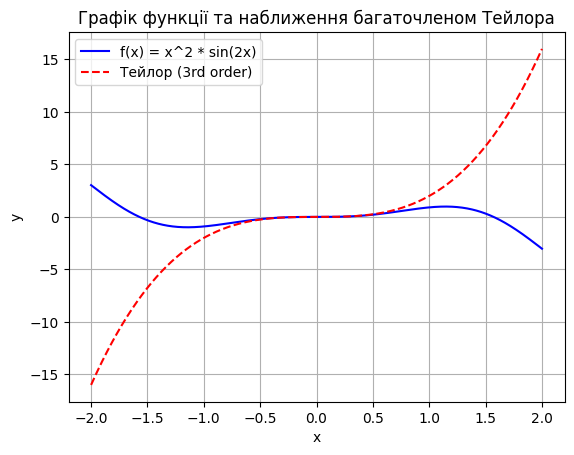

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
f = x**2 * sp.sin(2*x)

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення многочлена Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за багаточленом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =", T.evalf())

# Оцінка похибки
# Функція 4-го порядку для оцінки похибки
f4 = sp.diff(f3, x)
f4_x0 = f4.subs(x, x0).evalf()

# Оцінка похибки для модулю x, що не перевищує 0.5
x_error = 0.5
error = abs(f4_x0 / 24 * x_error**4)
print("Оцінка похибки при |x| <= 0.5:", error)

# Будуємо графіки
x_vals = np.linspace(-2, 2, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='f(x) = x^2 * sin(2x)', color='blue')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='red', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення багаточленом Тейлора")
plt.grid(True)
plt.show()


Коефіцієнти полінома Тейлора:         3             2
0.4217 x + 5.551e-16 x + 0.4876 x - 1.826e-17


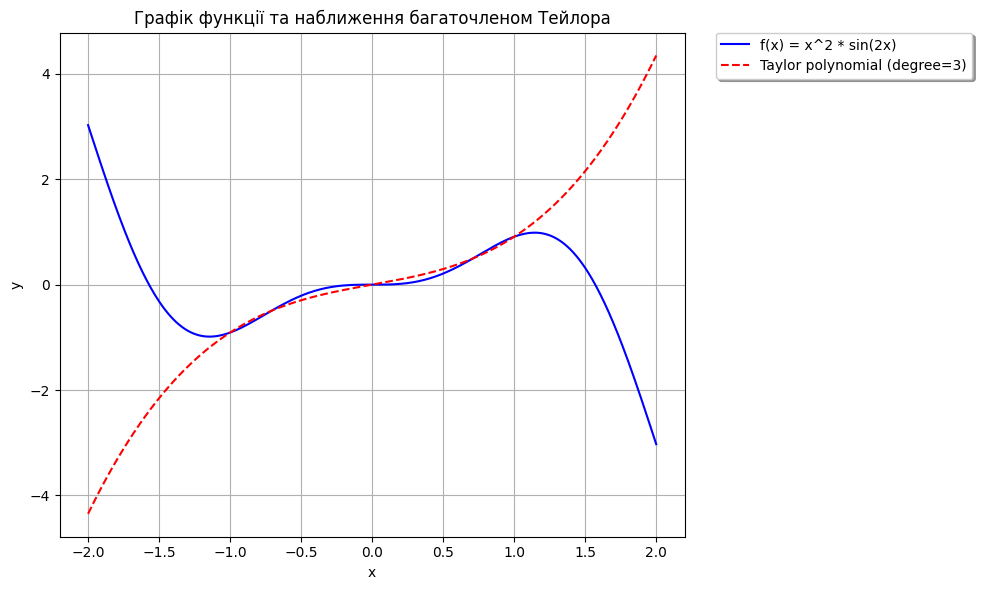

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

# Задана функція
def f(x):
    return x**2 * np.sin(2*x)
x = np.linspace(-2.0, 2.0, num=400)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) = x^2 * sin(2x)", color='blue')
degree = 3
taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('Коефіцієнти полінома Тейлора:', taylor)
plt.plot(x, taylor(x), label=f"Taylor polynomial (degree={degree})", color='red', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення багаточленом Тейлора")
plt.tight_layout()
plt.grid()
plt.show()
